# 15. Segmentation - Watersheds

In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def show_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

plt.rcParams['figure.figsize'] = [8, 10]

### Segment some color images using the marker-based watershed algorithm – `cv.watershed()`

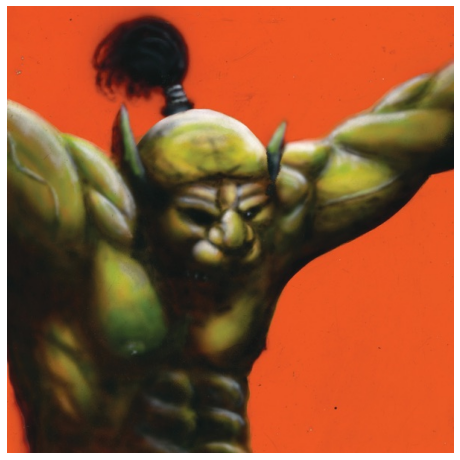

In [29]:
image = cv2.imread("Images/face.jpg") 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

show_image(image)

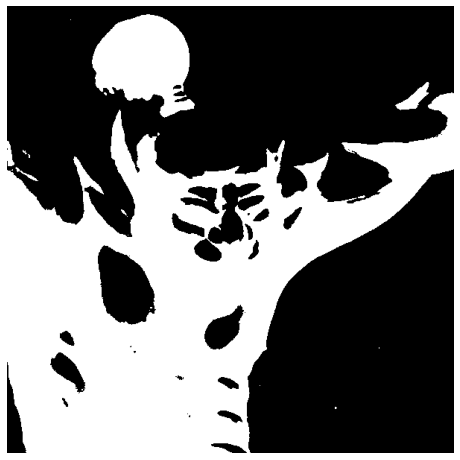

In [30]:
# First Step: finding an approximate estimate of the segments, using Otsu's binarization
_, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

show_image(threshold)

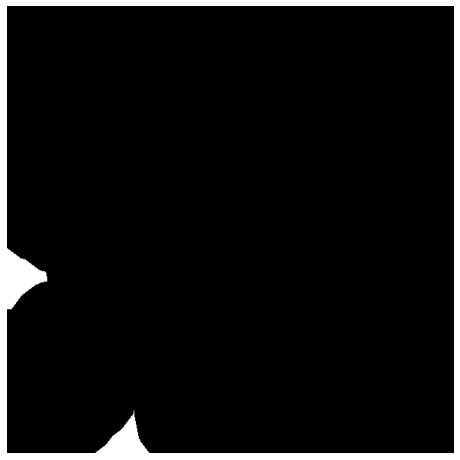

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


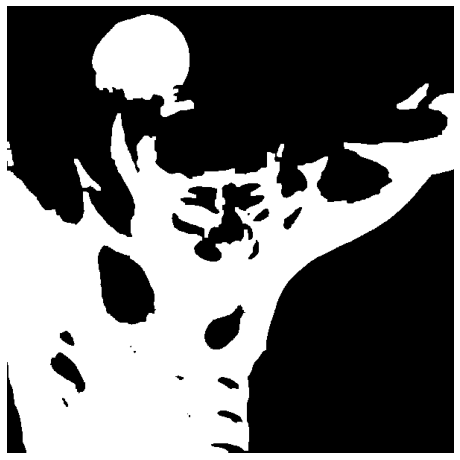

In [31]:
# Removing Noise
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel, iterations = 2)

# Getting the background area
background = cv2.dilate(opening,kernel, iterations=3)

# Getting the foreground area
distanceTransform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
_, foreground = cv2.threshold(distanceTransform, 0.7 * distanceTransform.max(), 255, 0)

# Getting the "unknown" area
foreground = np.uint8(foreground)
unknown = cv2.subtract(background, foreground)

show_image(foreground)
show_image(distanceTransform)

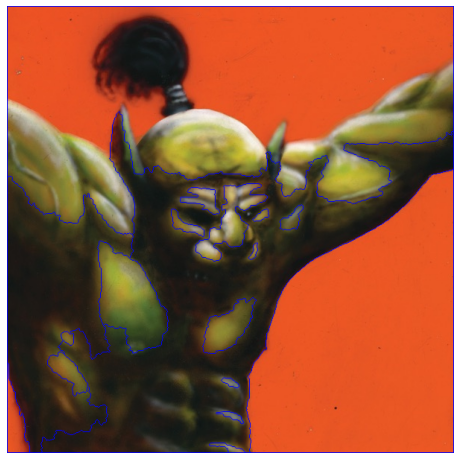

In [32]:
# Marker labelling
_, markers = cv2.connectedComponents(foreground)

# Add one to all labels so that sure background is not 0, but 1
markers += 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

# Finally apply Watershed
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

show_image(image)